<a href="https://colab.research.google.com/github/alihader88/MLModel/blob/main/trafficviolation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('trafficviolation-analysis')
jovian.set_colab_id('1mouw-gs6EqjdEob6JGVrGhk43_Gf6WjD')

     |████████████████████████████████| 68 kB 2.8 MB/s 


# trafficviolation-analysis

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian


Traffic Violation Exploratory Data Analysis

In [4]:
pip install opendatasets --upgrade --quiet


import dataset

In [5]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/rounak041993/traffic-violations-in-maryland-countyt'
od.download('https://www.kaggle.com/rounak041993/traffic-violations-in-maryland-county')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nidasyed2891
Your Kaggle Key: ··········


100%|██████████| 59.9M/59.9M [00:01<00:00, 38.5MB/s]


In [6]:
data_filename = './traffic-violations-in-maryland-county/Traffic_Violations.csv'

data preparation and cleaninig

In [7]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
df = pd.read_csv('/content/traffic-violations-in-maryland-county/Traffic_Violations.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2008.0,FORD,4S,BLACK,Citation,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,No,No,No,No,No,No,No,No,VA,02 - Automobile,2001.0,TOYOTA,COROLLA,GREEN,Citation,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,Yes,No,No,No,No,No,No,MD,02 - Automobile,2001.0,HONDA,ACCORD,SILVER,Citation,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,No,Yes,No,No,No,No,No,No,MD,02 - Automobile,1998.0,DODG,DAKOTA,WHITE,Citation,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2015.0,MINI COOPER,2S,WHITE,Citation,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292394,12/14/2012,23:56:00,MCP,Headquarters and Special Operations,Stop Lights,LOST KNOFE RD/ MVA,39.156846,-77.202903,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2007.0,TOYT,MATRIX,BLUE,ESERO,64*,NaN,No,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(39.1568459666667, -77.2029032166667)"
1292395,12/15/2012,00:11:00,MCP,Headquarters and Special Operations,Headlights,MIDCOUNTY HWY/ MILLER FALL DR,39.143137,-77.158675,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,1998.0,HOND,CIVIC,GREEN,ESERO,55*,NaN,No,HISPANIC,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1431373333333, -77.1586750333333)"
1292396,12/15/2012,00:30:00,MCP,Headquarters and Special Operations,Stop Lights,270/ MVA,39.152770,-77.220292,No,No,No,No,No,No,No,No,No,No,MD,05 - Light Duty Truck,2006.0,HOND,CRV,BLUE,ESERO,64*,NaN,No,WHITE,F,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1527700833333, -77.2202923833333)"
1292397,12/16/2012,22:55:00,MCP,Headquarters and Special Operations,Tag Lights,MD 97/ ASPEN HILL RD,39.080061,-77.074347,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2003.0,CHEV,CAVALIER,YELLOW,ESERO,65*,NaN,No,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0800610666667, -77.0743472)"


In [10]:
numerics = ['float64']
numeric_df = df.select_dtypes(include= numerics)
len(numeric_df.columns)

3

In [11]:
missing_percentages = df.isna().sum().sort_values(ascending= False)/len(df)
missing_percentages[missing_percentages != 0]

Geolocation     0.073781
Longitude       0.073781
Latitude        0.073781
Article         0.050425
Color           0.012478
Year            0.006247
DL State        0.000719
Driver City     0.000168
Model           0.000145
State           0.000046
Make            0.000044
Driver State    0.000009
SubAgency       0.000008
Description     0.000007
Location        0.000002
dtype: float64

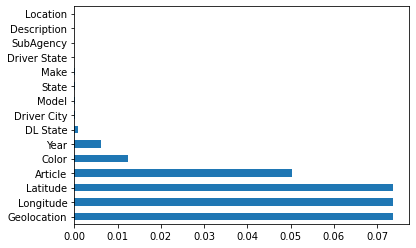

In [12]:
missing_percentages[missing_percentages != 0].plot(kind= 'barh')

In [13]:
df.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type',
       'Geolocation'],
      dtype='object')

In [14]:


locations = df.Location.unique()
len(locations)
Vehicletype = df.VehicleType.unique()
len(Vehicletype)


33

In [ ]:
Vehicletype = df.VehicleType.unique()
len(Vehicletype)


17561

In [ ]:
make =df.Make.unique()
len(make)

3550

In [ ]:
Accident = df.Accident.value_counts()
Accident

No    1292399
Name: Accident, dtype: int64

In [ ]:
locationcount[:20]

IS 370 @ IS 270                            1981
WAYNE AVE @ DALE DR                        1894
W/B IS 370 @ IS 270                        1884
WOODFIELD RD @ EMORY GROVE RD              1584
RANDOLPH / COLIE                           1494
10901 WESTLAKE DRIVE                       1452
RT 28 @ BLACKBERRY DR                      1443
MONTGOMERY VILLAGE AVE @ RUSSELL AVE       1360
CLOPPER RD E/B @ ORCHARD HILLS DR          1323
COLESVILLE RD @ GEORGIA AVE                1242
RIDGE RD @ OBSERVATION DR                  1156
FREDERICK RD/COLLEGE PKWY                  1112
WAYNE AVE / DALE DR                        1064
WB RT.198 @ SANTINI ROAD                   1033
CONNECTICUT AVE / DEAN RD                   946
GEORGIA AVE/COLESVILLE RD                   930
GEORGIA AVE @ COLESVILLE RD                 849
ASPEN HILL RD @ FRANKFORT DR                787
GEORGIA AVE / CONNECTICUT AVE               783
SHADY GROVE METRO EXIT @ SHADY GROVE RD     781
Name: Location, dtype: int64

In [ ]:
type(locationcount)

pandas.core.series.Series

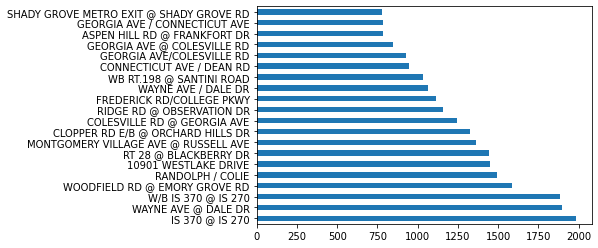

In [ ]:
locationcount[:20].plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

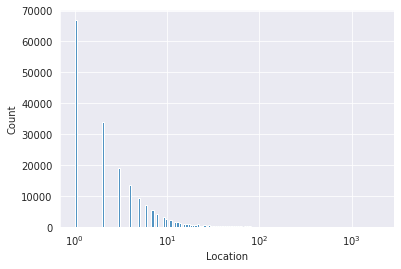

In [ ]:
sns.histplot(locationcount, log_scale=True)

In [ ]:
locationcount[locationcount == 1]

JONES LANE @ NORMAN DRIVE          1
ROCKVILLE PIKE @ WILLOW LANE       1
GEORGIA AVE  GEORGIAN WOODS        1
118 PRIOR TO MIDDLEBROOK           1
GERMANTOWN RD @ GEATSENECA HWY     1
                                  ..
NEW HAMPSHIRE AVE/CAPE MAY ROAD    1
MORNINGWOOD DRIVE/                 1
RT 29/ FAIRVIEW RD                 1
BROOKVILLE RD @  WARREN ST         1
PARKER AVE/NEWPORT MILL RD         1
Name: Location, Length: 66981, dtype: int64

In [ ]:
color = df.Color.value_counts()
color

BLACK          259499
SILVER         236828
WHITE          197558
GRAY           141092
RED            101733
BLUE            94814
GREEN           49520
GOLD            41177
BLUE, DARK      27111
TAN             27015
MAROON          22408
BLUE, LIGHT     17221
BEIGE           15047
GREEN, DK       14457
GREEN, LGT       7345
BROWN            6021
YELLOW           4889
ORANGE           4538
BRONZE           2964
PURPLE           2524
MULTICOLOR       1021
CREAM             837
COPPER            414
PINK              188
CHROME             27
CAMOUFLAGE         24
Name: Color, dtype: int64

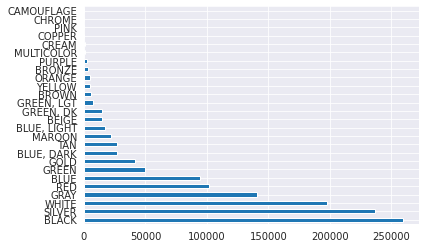

In [ ]:
color.plot(kind='barh')

In [ ]:
df.Latitude

0                NaN
1          38.981725
2          39.162888
3          39.056975
4                NaN
             ...    
1292394    39.156846
1292395    39.143137
1292396    39.152770
1292397    39.080061
1292398    39.017139
Name: Latitude, Length: 1292399, dtype: float64

In [ ]:
df.Longitude

0                NaN
1         -77.092757
2         -77.229088
3         -76.954633
4                NaN
             ...    
1292394   -77.202903
1292395   -77.158675
1292396   -77.220292
1292397   -77.074347
1292398   -77.006379
Name: Longitude, Length: 1292399, dtype: float64

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))

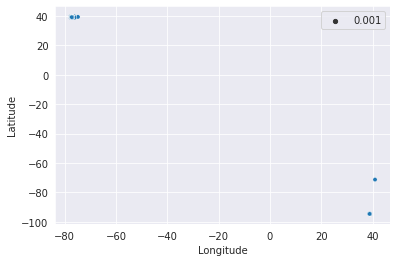

In [ ]:
sns.scatterplot(x=sample_df.Longitude, y=sample_df.Latitude, size=0.001)

In [ ]:
wrokzone = df["Work Zone"].unique()
len(wrokzone)

2

In [ ]:
sub_df = pd.DataFrame(zip(df['Article'],df['Alcohol'],df['Belts'],df['Fatal']), columns=['violation','alcohol','belts','fatal'])
sub_df['alcohol'] = sub_df.alcohol.eq('Yes').mul(1)
sub_df['belts'] = sub_df.belts.eq('Yes').mul(1)
sub_df['fatal'] = sub_df.fatal.eq('Yes').mul(1)
sub_df.set_index('violation').describe()

,alcohol,belts,fatal
count,1.292399e+06,1.292399e+06,1.292399e+06
mean,1.708451e-03,3.438799e-02,2.158776e-04
std,4.129810e-02,1.822237e-01,1.469119e-02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
import numpy as np
sub_df1 = pd.DataFrame(zip(df['Violation Type'],df['Alcohol'],df['Belts'],df['Fatal']), columns=['violation','alcohol','belts','fatal'])
sub_df1['alcohol'] = sub_df1.alcohol.eq('Yes').mul(1)
sub_df1['belts'] = sub_df1.belts.eq('Yes').mul(1)
sub_df1['fatal'] = sub_df1.fatal.eq('Yes').mul(1)
table1 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal'], columns='violation', aggfunc=np.mean)
table1

violation,Citation,ESERO,SERO,Warning
alcohol,0.003427,0.000109,0.002169,0.000190
belts,0.043493,0.028027,0.069414,0.026080
fatal,0.000310,0.000047,0.000000,0.000142


In [ ]:
df_chi = pd.read_csv('/content/traffic-violations-in-maryland-county/Traffic_Violations.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
contingency_table=pd.crosstab(df_chi["Gender"],df_chi["Belts"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 Belts       No    Yes
Gender               
F       409196  15901
M       837330  28532
U         1430     10


In [ ]:
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[409196  15901]
 [837330  28532]
 [  1430     10]]


In [ ]:

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[4.10478770e+05 1.46182301e+04]
 [8.36086749e+05 2.97752512e+04]
 [1.39048130e+03 4.95187013e+01]]


In [ ]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df11=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)
alpha = 0.05

Degree of Freedom:-         Date Of Stop  ...                            Geolocation
0         09/24/2013  ...                                    NaN
1         08/29/2017  ...         (38.981725, -77.0927566666667)
2         12/01/2014  ...  (39.1628883333333, -77.2290883333333)
3         08/29/2017  ...         (39.056975, -76.9546333333333)
4         08/28/2017  ...                                    NaN
...              ...  ...                                    ...
1292394   12/14/2012  ...  (39.1568459666667, -77.2029032166667)
1292395   12/15/2012  ...  (39.1431373333333, -77.1586750333333)
1292396   12/15/2012  ...  (39.1527700833333, -77.2202923833333)
1292397   12/16/2012  ...        (39.0800610666667, -77.0743472)
1292398   12/21/2012  ...  (39.0171391166667, -77.0063790833333)

[1292399 rows x 35 columns]


In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 202.9949089652516


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=df11)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [ ]:

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df11)
print('p-value:',p_value)

p-value: 0.0


In [ ]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',df11)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 202.9949089652516
critical_value: 3.841458820694124
p-value: 0.0


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


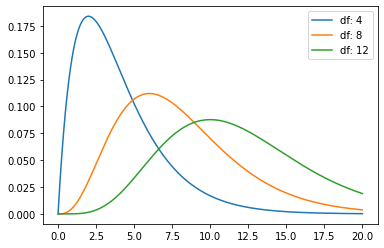

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#define multiple Chi-square distributions
plt.plot(x, chi2.pdf(x, df=4), label='df: 4')
plt.plot(x, chi2.pdf(x, df=8), label='df: 8') 
plt.plot(x, chi2.pdf(x, df=12), label='df: 12') 

#add legend to plot
plt.legend()

In [ ]:
df.columns



Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type',
       'Geolocation'],
      dtype='object')

In [ ]:

cdf = df[['Alcohol','Belts','Gender','Fatal','Accident']]
cdf.head(9)


,Alcohol,Belts,Gender,Fatal,Accident
0,No,No,M,No,No
1,No,No,F,No,No
2,No,No,F,No,No
3,No,No,M,No,No
4,No,No,M,No,No
5,No,No,F,No,No
6,No,No,M,No,No
7,No,No,M,No,No
8,No,No,M,No,No


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292399 entries, 0 to 1292398
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1292399 non-null  object 
 1   Time Of Stop             1292399 non-null  object 
 2   Agency                   1292399 non-null  object 
 3   SubAgency                1292389 non-null  object 
 4   Description              1292390 non-null  object 
 5   Location                 1292397 non-null  object 
 6   Latitude                 1197045 non-null  float64
 7   Longitude                1197045 non-null  float64
 8   Accident                 1292399 non-null  object 
 9   Belts                    1292399 non-null  object 
 10  Personal Injury          1292399 non-null  object 
 11  Property Damage          1292399 non-null  object 
 12  Fatal                    1292399 non-null  object 
 13  Commercial License       1292399 non-null 

In [ ]:
dummy_var = ['Accident', 'Alcohol', 'Belts', 'Gender', 'Fatal']
df_oh = pd.get_dummies( df, columns= dummy_var, drop_first= True)
df_oh.describe()




,Latitude,Longitude,Year,Alcohol_Yes,Belts_Yes,Gender_M,Gender_U,Fatal_Yes
count,1.197045e+06,1.197045e+06,1.284325e+06,1.292399e+06,1.292399e+06,1.292399e+06,1.292399e+06,1.292399e+06
mean,3.907435e+01,-7.710341e+01,2.005139e+03,1.708451e-03,3.438799e-02,6.699649e-01,1.114207e-03,2.158776e-04
std,1.062592e+00,9.588788e-01,8.720162e+01,4.129810e-02,1.822237e-01,4.702256e-01,3.336115e-02,1.469119e-02
min,-9.461099e+01,-1.512560e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.903149e+01,-7.719467e+01,2.002000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.907336e+01,-7.709332e+01,2.006000e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,3.913867e+01,-7.704381e+01,2.011000e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,7.718716e+01,4.151207e+01,9.999000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
import numpy as np
Accident = pd.DataFrame(
    {
 "Accident": pd.Series([True, False , np.nan], dtype=np.dtype("O"))
    }
)
accident = df.convert_dtypes()
accident

,Gender
0,M
1,F
2,U


In [ ]:
import numpy as np
df = pd.DataFrame(
    {
 "Alcohol": pd.Series([True, False , np.nan], dtype=np.dtype("O"))
    }
)
Alcohol = df.convert_dtypes()


,Alcohol
0,True
1,False
2,<NA>


In [ ]:
import numpy as np
df = pd.DataFrame(
    {
 "Belts": pd.Series([True, False , np.nan], dtype=np.dtype("O"))
    }
)
Belts = df.convert_dtypes()


,Belts
0,True
1,False
2,<NA>


In [ ]:
import numpy as np
df = pd.DataFrame(
    {
 "Fatal": pd.Series([True, False , np.nan], dtype=np.dtype("O"))
    }
)
Fatal = df.convert_dtypes()

,Fatal
0,True
1,False
2,<NA>


In [ ]:
import numpy as np
df = pd.DataFrame(
    {
 "Gender": pd.Series(['M', 'F' , 'U'], dtype=np.dtype("O"))
    }
)
Gender= df.convert_dtypes()
Gender

,Gender
0,M
1,F
2,U


In [15]:
cdf = df[['Alcohol','Belts','Gender','Fatal','Accident']]
cdf.head(9)

,Alcohol,Belts,Gender,Fatal,Accident
0,No,No,M,No,No
1,No,No,F,No,No
2,No,No,F,No,No
3,No,No,M,No,No
4,No,No,M,No,No
5,No,No,F,No,No
6,No,No,M,No,No
7,No,No,M,No,No
8,No,No,M,No,No
